In [22]:
import utils

In [23]:
project_data = "playground-series-s5e12.zip"

In [ ]:
utils.extract_from_zip(project_data)

## Read the data

In [24]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [25]:
data_dir = Path(project_data.split('.')[0])
train_data = pd.read_csv(data_dir / "train.csv")
test_data = pd.read_csv(data_dir / "test.csv")

In [26]:
train_data.shape

(700000, 26)

In [27]:
train_data.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,31,50,32,54,54
alcohol_consumption_per_week,1,2,3,3,1
physical_activity_minutes_per_week,45,73,158,77,55
diet_score,7.7,5.7,8.5,4.6,5.7
sleep_hours_per_day,6.8,6.5,7.4,7.0,6.2
screen_time_hours_per_day,6.1,5.8,9.1,9.2,5.1
bmi,33.4,23.8,24.1,26.6,28.8
waist_to_hip_ratio,0.93,0.83,0.83,0.83,0.9
systolic_bp,112,120,95,121,108


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

- No null values in the data.
- some columns with `object` dtype need conversion to float
- object dtype columns are categorical attributes with multiple categories, while `family_history_diabetes`, `hypertension_history` and `cardiovascular_history` are binary categorical attributes already encoded as 0s and 1s.
- drop the `id` column for input to the model.


In [29]:
train_data[['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']].head()

,family_history_diabetes,hypertension_history,cardiovascular_history
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,1,0


In [30]:
train_data.select_dtypes(object)

,gender,ethnicity,education_level,income_level,smoking_status,employment_status
0,Female,Hispanic,Highschool,Lower-Middle,Current,Employed
1,Female,White,Highschool,Upper-Middle,Never,Employed
2,Male,Hispanic,Highschool,Lower-Middle,Never,Retired
3,Female,White,Highschool,Lower-Middle,Current,Employed
4,Male,White,Highschool,Upper-Middle,Never,Retired
...,...,...,...,...,...,...
699995,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed
699996,Female,Hispanic,Graduate,Upper-Middle,Former,Employed
699997,Female,White,Graduate,Middle,Never,Employed
699998,Female,White,Highschool,Lower-Middle,Never,Retired


**Histograms:**

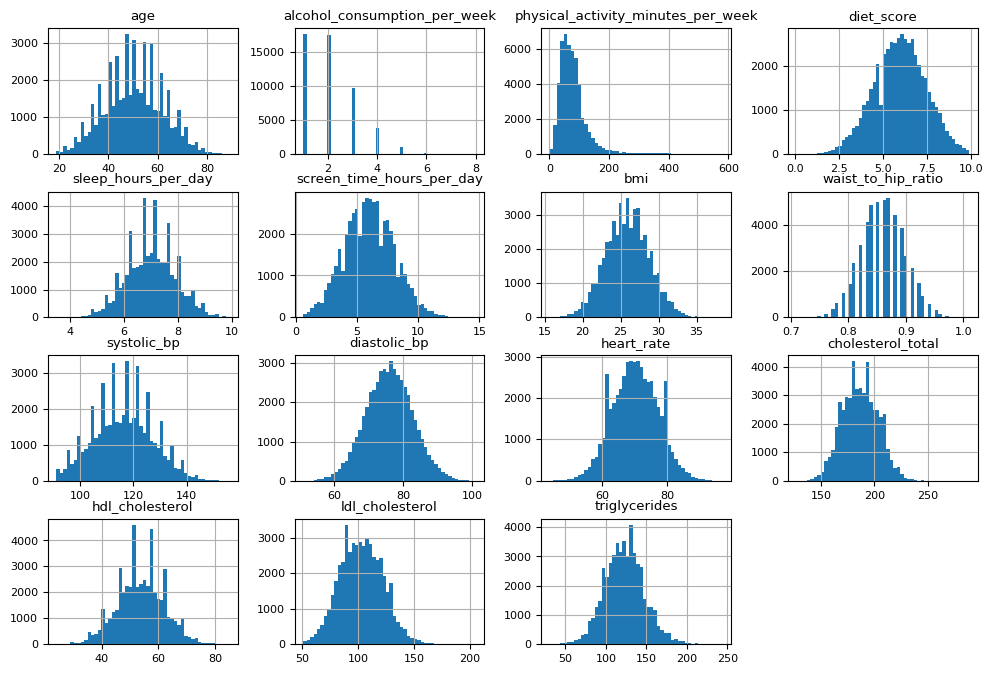

In [31]:
plt.rc('font', size=8)
train_data.iloc[np.random.randint(len(train_data), size=(50_000)), 1:16].hist(bins=50, figsize=(12, 8))
plt.show()

<Axes: xlabel='physical_activity_minutes_per_week', ylabel='diagnosed_diabetes'>

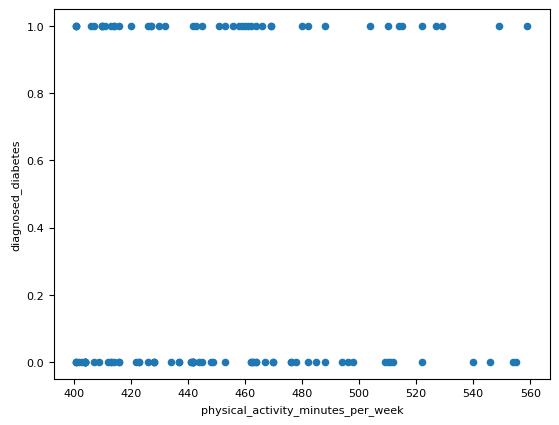

In [32]:
train_data.sample(50000).loc[train_data.physical_activity_minutes_per_week > 400].plot(x="physical_activity_minutes_per_week", y="diagnosed_diabetes", kind="scatter")

<Axes: xlabel='age', ylabel='diagnosed_diabetes'>

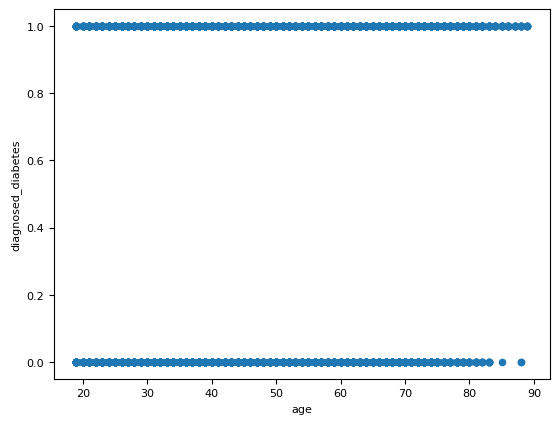

In [33]:
train_data.sample(50000).plot(x="age", y="diagnosed_diabetes", kind="scatter")

In [34]:
train_data.corr(numeric_only=True)['diagnosed_diabetes'].sort_values(ascending=False)

diagnosed_diabetes                    1.000000
family_history_diabetes               0.211064
age                                   0.161162
systolic_bp                           0.107132
bmi                                   0.105580
ldl_cholesterol                       0.102771
triglycerides                         0.090635
cholesterol_total                     0.088112
waist_to_hip_ratio                    0.081050
diastolic_bp                          0.036271
hypertension_history                  0.029979
cardiovascular_history                0.024746
heart_rate                            0.023865
screen_time_hours_per_day             0.018213
sleep_hours_per_day                   0.003509
alcohol_consumption_per_week          0.002991
id                                   -0.000075
diet_score                           -0.050119
hdl_cholesterol                      -0.053231
physical_activity_minutes_per_week   -0.169789
Name: diagnosed_diabetes, dtype: float64

In [56]:
train_data.corr(numeric_only=True)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
id,1.000000,0.001615,0.001614,0.012424,0.000878,-0.002118,-0.000716,-0.000692,-0.000144,0.001546,-0.000234,-0.000764,0.000518,-0.000368,0.000129,0.001865,0.000630,-0.000883,0.000729,-0.000075
age,0.001615,1.000000,0.003295,-0.029101,-0.001898,-0.001286,-0.002313,0.062958,0.044654,0.502894,0.188403,0.004294,0.283155,0.002654,0.245503,0.043605,0.018417,0.177636,0.099604,0.161162
alcohol_consumption_per_week,0.001614,0.003295,1.000000,0.003010,0.003284,-0.000351,0.004797,-0.017552,-0.014716,-0.006472,-0.001502,0.002230,-0.003121,0.009062,-0.006305,0.099985,0.002069,-0.003983,-0.001566,0.002991
physical_activity_minutes_per_week,0.012424,-0.029101,0.003010,1.000000,0.008466,-0.006900,0.001754,-0.085086,-0.067508,-0.030908,-0.018341,-0.268426,-0.027439,0.015996,-0.033272,-0.045595,-0.035260,-0.005766,-0.002205,-0.169789
diet_score,0.000878,-0.001898,0.003284,0.008466,1.000000,0.000882,0.000382,-0.198899,-0.150906,-0.038676,-0.028384,0.005116,-0.041622,0.043585,-0.055908,-0.101834,-0.005173,0.001112,0.002690,-0.050119
sleep_hours_per_day,-0.002118,-0.001286,-0.000351,-0.006900,0.000882,1.000000,0.005965,0.003380,0.000371,0.003995,0.001457,0.009711,0.001287,-0.000549,0.001452,-0.005351,0.002502,0.005092,0.002002,0.003509
screen_time_hours_per_day,-0.000716,-0.002313,0.004797,0.001754,0.000382,0.005965,1.000000,0.002758,0.003393,0.004276,-0.004632,-0.000152,-0.003384,-0.003529,-0.000059,0.003124,0.004202,0.001416,0.000836,0.018213
bmi,-0.000692,0.062958,-0.017552,-0.085086,-0.198899,0.003380,0.002758,1.000000,0.757191,0.225033,0.143702,0.009575,0.180075,-0.197702,0.241057,0.443837,0.006417,0.009471,0.003461,0.105580
waist_to_hip_ratio,-0.000144,0.044654,-0.014716,-0.067508,-0.150906,0.000371,0.003393,0.757191,1.000000,0.171691,0.111056,0.008807,0.146030,-0.154951,0.193638,0.359802,0.004509,0.006384,0.000885,0.081050
systolic_bp,0.001546,0.502894,-0.006472,-0.030908,-0.038676,0.003995,0.004276,0.225033,0.171691,1.000000,0.132916,0.005208,0.196124,-0.039579,0.187003,0.125682,0.009284,0.093637,0.052653,0.107132


- high correlation between bmi and triglycerides
- high correlation between bmi and waist-to-hip ratio
- high correlation between systolic bp and age
- high correlation between cholesterol_total and Idl_cholesterol

## Create test set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop("diagnosed_diabetes", axis=1), train_data["diagnosed_diabetes"],
                                                    test_size=.15, random_state=42)
X_train = X_train.drop('id', axis=1)
X_test = X_test.drop('id', axis=1)

## Data preprocessing

In [79]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [80]:
def combined_historical_attributes(X):
    return X.sum(axis=1).reshape(-1, 1)

In [88]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline_1 = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))
cat_pipeline_2 = make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder(handle_unknown="error"))
cat_pipeline_3 = make_pipeline(SimpleImputer(strategy="most_frequent"), FunctionTransformer(combined_historical_attributes))

preprocessing_pipeline = make_column_transformer(
    (num_pipeline, ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol']),
    # removed ldl cholesterol due to high correlation with cholesterol_total. similarly removed triglycides, waist_to_hip_ratio due to correlation with bmi.
    # similarly removed systolic_bp for correlation with age
    (cat_pipeline_1, ['gender', 'ethnicity', 'smoking_status', 'employment_status']),
    (cat_pipeline_2, ['education_level', 'income_level']),
    (cat_pipeline_3, ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']),
    remainder='drop'
)

In [89]:
preprocessing_pipeline

,transformers,"[('pipeline-1', ...), ('pipeline-2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


Overall, have tried reducing the dimensionality of the data this time.

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [91]:
log_reg = make_pipeline(preprocessing_pipeline, LogisticRegression())

In [92]:
log_reg.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline-1', ...), ('pipeline-2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [93]:
y_pred_prob_log_reg = log_reg.predict_proba(X_test)

In [103]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score

In [95]:
recall_score(y_test, y_pred_prob_log_reg[:, 1] > 0.5)

0.8834349283754953

In [96]:
roc_auc_score(y_test, y_pred_prob_log_reg[:, 1])

0.668739118327369

In [108]:
rf = make_pipeline(preprocessing_pipeline, RandomForestClassifier(n_estimators=500, min_samples_leaf=5000))
rf.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline-1', ...), ('pipeline-2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [109]:
y_pred_prob_rf = rf.predict_proba(X_test)

In [110]:
recall_score(y_test, y_pred_prob_rf[:, 1] > 0.5)

0.9504419384334044

In [111]:
roc_auc_score(y_test, y_pred_prob_rf[:, 1])

0.6670589473628812

In [112]:
accuracy_score(y_test, y_pred_prob_rf[:, 1] > 0.5)

0.6486857142857143

In [113]:
accuracy_score(y_train, rf.predict(X_train))

0.6487966386554622

**performing worse than previous models.**

## Submission output

In [101]:
def submission_output(estimator, test_data, file_name):
    test_set_predictions = estimator.predict_proba(test_data)[:, 1]
    test_data["diagnosed_diabetes"] = test_set_predictions
    test_data[["id", "diagnosed_diabetes"]].to_csv(file_name, index=False)

In [105]:
# submission_output(log_reg, "01_log_reg_3_variables.csv")

In [102]:
submission_output(rf, test_data, "05_rf_attribute_combination.csv")

---

- boosting models
- grid search CV
- final model training on full dataset
- roc curve
- how balanced or unbalanced is the target variable?
  